In [1]:
from meteostat import Stations, Daily
from datetime import datetime
import numpy as np

# Obtaining data

The first step is to choose the station in the state of Puebla, Mexico.

In [2]:
stations = Stations()
stations = stations.region('MX','PUE')
stations = stations.fetch(stations.count())

print(stations)

                           name country region    wmo  icao  latitude  \
id                                                                      
76685              Puebla, Pue.      MX    PUE  76685  MMPB   19.0500   
MMHC0  Tehuacan / Cinco Señores      MX    PUE   <NA>  MMHC   18.4971   

       longitude  elevation             timezone hourly_start hourly_end  \
id                                                                         
76685   -98.1667     2179.0  America/Mexico_City   1973-01-02 2024-10-06   
MMHC0   -97.4198     1679.0  America/Mexico_City   1973-01-01 1977-02-01   

      daily_start  daily_end monthly_start monthly_end  
id                                                      
76685  1975-04-04 2024-12-30    1988-01-01  2022-01-01  
MMHC0         NaT        NaT           NaT         NaT  


We conclude that Puebla, Pue. Station with WMO code 76685 is the station located at Puebla City, the study site. Now we analyze the coverage of the data to choose the appropiate period.

In [3]:
start = datetime(1974, 1, 1)
end = datetime(2024, 1, 1)

data = Daily('76685', start=start, end=end)
coverage_50_years = data.coverage()

start = datetime(1994, 1, 1)
end = datetime(2024, 1, 1)

data = Daily('76685', start = start, end = end)
coverage_30_years = data.coverage()

print('For 50 years the coverage is ' + '{:.2f}'.format(coverage_50_years * 100) 
      + '% and for 30 years is ' + '{:.2f}'.format(coverage_30_years * 100) + '%')

For 50 years the coverage is 74.18% and for 30 years is 99.98%


Since 30-years period has a suitable coverage in comparison to 50-years period, we normalize data. This step is esential for inteporlation and filling gaps.

In [4]:
start = datetime(1994, 1, 1)
end = datetime(2024, 1, 1)

data = Daily('76685', start=start, end=end)
data = data.normalize()
data = data.fetch()

data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1994-01-01,14.3,5.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-02,16.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-03,14.1,0.0,21.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,14.0,2.8,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,10.6,-1.6,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Now that the normalization is completed, we proceed to interpolate the data.

In [5]:
data = data.interpolate()
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1994-01-01,14.3,5.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-02,16.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-03,14.1,0.0,21.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,14.0,2.8,22.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,10.6,-1.6,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
np.mean(data.prcp)

np.float64(3.247700310275598)

# Data processing

## Precipitation

In [7]:
precipitation_threshold = np.percentile(data['prcp'].dropna(), 95)
print(precipitation_threshold)
extreme_precipitation = data[data['prcp'] > precipitation_threshold]

14.5


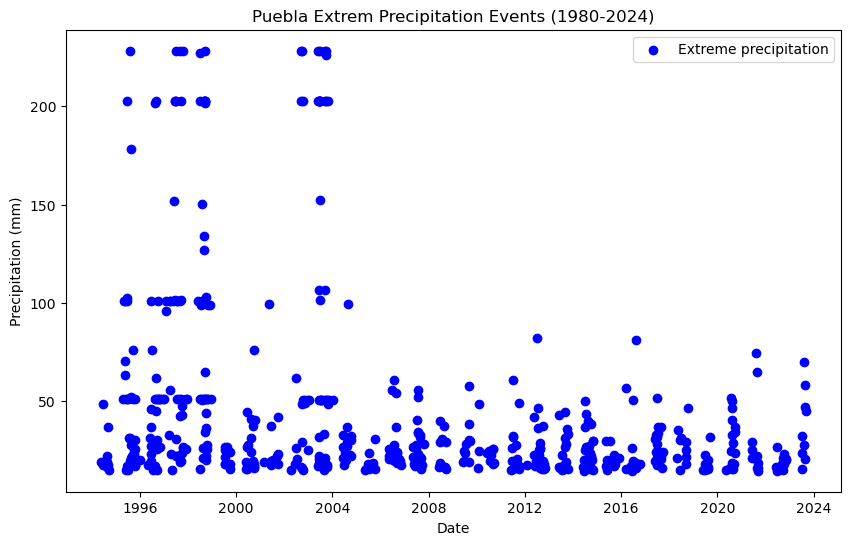

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(extreme_precipitation.index, extreme_precipitation['prcp'], color='blue', label='Extreme precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Puebla Extrem Precipitation Events (1980-2024)')
plt.legend()
plt.show()

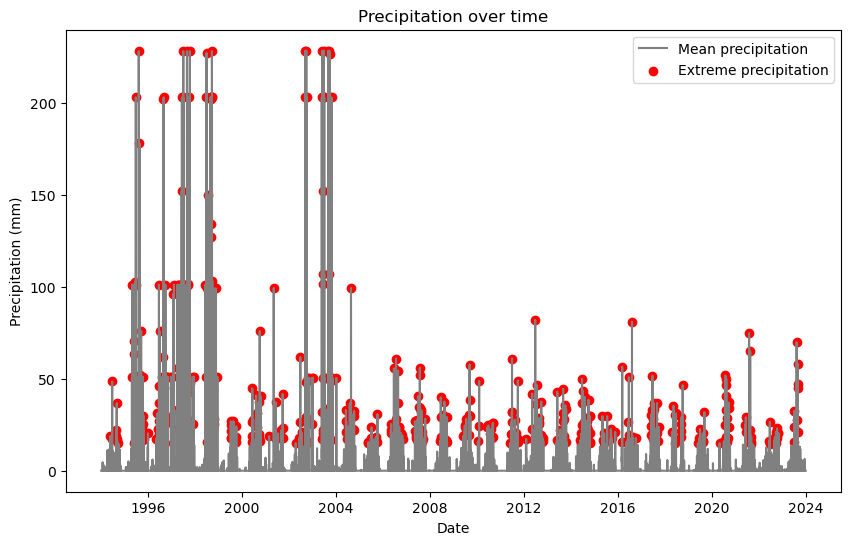

In [9]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['prcp'], color='gray', label='Mean precipitation')
plt.scatter(extreme_precipitation.index, extreme_precipitation['prcp'], color='red', label='Extreme precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation over time')
plt.legend()
plt.show()

## 